<a href="https://colab.research.google.com/github/MaruthiMax/INFO-5731_SPRING2024/blob/main/lingampalli_maruthi_Exercise_5_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 5**

**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## **Question 1 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for Sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the cl. The final trained model was final evaluated on the test data.


**Algorithms:**

*   MultinominalNB
*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

**Evaluation measurement:**


*   Accuracy
*   Recall
*   Precison
*   F-1 score


In [1]:
#importing all necessary libraries
import pandas as pd
import nltk
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection
from sklearn import naive_bayes, svm
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import warnings

# dowloading all moudules of nltk
nltk.download('stopwords')
nltk.download('wordnet')

# loading the warnings to ignore
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# definning a function to read the attributed file and get text and Sentiments
def read_file(path):
    text_in_file, sentmts = [], []
    file = open(path).read()
    for a, b in enumerate(file.split("\n")):
        n_file = b.split(' ')
        text_in_file.append(" ".join(n_file[1:]))
        sentmts.append(n_file[0])
    return text_in_file, sentmts

In [3]:
# defining a function to preprocess the data frame of the data
def prepros_the_data(data_frame):

    data_frame['Sentiment_in_data'] = pd.to_numeric(data_frame['Sentiment_in_data'], errors='coerce')
    data_frame = data_frame.dropna(subset=['Sentiment_in_data'])
    data_frame['remove_the_noise'] = data_frame['full data'].apply(lambda x: ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', ch) for ch in x))
    data_frame['remove_ptns'] = data_frame['remove_the_noise'].str.replace('[^\w\s]', '')
    stop_word_remov = stopwords.words('english')
    data_frame['stopwords_remove'] = data_frame['remove_ptns'].apply(
        lambda a: " ".join(a for a in a.split() if a not in stop_word_remov))
    data_frame['lower'] = data_frame['stopwords_remove'].apply(lambda a: " ".join(a.lower() for w in a.split()))

    return data_frame


In [4]:
# defining a function to convert all text of the given data and store data into x train and x test
def vector_data(train, test):

    tf_idf = TfidfVectorizer(analyzer='word')
    tf_idf.fit(train['lower'])
    x_train = tf_idf.transform(train['lower'])
    tfidf_test_vec = TfidfVectorizer(analyzer='word', vocabulary=tf_idf.vocabulary_)
    tfidf_test_vec.fit(test['lower'])
    x_test = tfidf_test_vec.transform(test['lower'])

    return x_train, x_test

In [5]:
# defining a function to evaluate the classifers we have testing on the data
def evaluate_modl(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    predicted_val = model.predict(x_test)
    acc_model = accuracy_score(predicted_val, y_test)
    print(f" model accuracy is  {model.__class__.__name__}: {acc_model}")

    if 'XGB' not in str(model):
        scoring_of_model = 'accuracy'
        k_fold = KFold(10, random_state=9, shuffle=True)
        model_c_score = cross_val_score(model, x_test, y_test, cv=k_fold, scoring=scoring_of_model).mean()
        print(f"Cross-validation score of model {model.__class__.__name__}: {model_c_score}")

    print(f"\nClassification Report of model {model.__class__.__name__} is:\n")
    print(classification_report(y_test, predicted_val))


In [6]:
# the data frames separetly for train and test data
df_train, Sentiment_train = read_file('stsa-train.txt')
df_test, sentiment_test = read_file('stsa-test.txt')

# now unziping thr folder of train and test
df_trai = pd.DataFrame(list(zip( Sentiment_train,df_train )), columns=['Sentiment_in_data', 'full data'])
daat_of_Sentiment=pd.DataFrame(list(zip( sentiment_test,df_test)), columns=['Sentiment_in_data', 'full data'])

# then preprocessing of the data is carried out here
df_trai = prepros_the_data(df_trai)
daat_of_Sentiment = prepros_the_data(daat_of_Sentiment)

# then declsred the x train and test in the below
x_train, x_test = vector_data(df_trai, daat_of_Sentiment)

# the final split of the data is below for training and testing
x_train, x_tst, y_train, y_tst = model_selection.train_test_split(x_train, df_trai['Sentiment_in_data'],
                                                                      test_size=0.2, random_state=24)


In [7]:
#converting the train and test into integer below
y_train = y_train.astype(int)
y_tst = y_tst.astype(int)

# defining the classifying models as mentioned in the description of the question
clsy_models = [
    naive_bayes.MultinomialNB(),
    svm.SVC(),
    KNeighborsClassifier(n_neighbors=5),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    XGBClassifier()
]

# below we are performing model perormence evalution
for model in clsy_models:
    print(f"Emodel performence is  {model.__class__.__name__} on the test set:")
    evaluate_modl(model, x_train, y_train, x_test, daat_of_Sentiment['Sentiment_in_data'])


Emodel performence is  MultinomialNB on the test set:
 model accuracy is  MultinomialNB: 0.7803404722679846
Cross-validation score of model MultinomialNB: 0.7380441962409175

Classification Report of model MultinomialNB is:

              precision    recall  f1-score   support

         0.0       0.85      0.68      0.76       912
         1.0       0.73      0.88      0.80       909

    accuracy                           0.78      1821
   macro avg       0.79      0.78      0.78      1821
weighted avg       0.79      0.78      0.78      1821

Emodel performence is  SVC on the test set:
 model accuracy is  SVC: 0.7885777045579352
Cross-validation score of model SVC: 0.717201104906023

Classification Report of model SVC is:

              precision    recall  f1-score   support

         0.0       0.82      0.74      0.78       912
         1.0       0.76      0.83      0.80       909

    accuracy                           0.79      1821
   macro avg       0.79      0.79      0.79   

In [8]:
# Word2vec we are creating here by importing all necesssary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk

nltk.download('punkt')
# now we are spliting into dataframes separtely for train and test

df_train_ = prepros_the_data(df_trai)
df_test_ = prepros_the_data(daat_of_Sentiment)

df_train_, df_test_ = train_test_split(df_train_,test_size=0.2, random_state=45)

# making all words into tokens in both traina and test df
token_train = df_train_['full data'].apply(word_tokenize)
ts_token = df_test_['full data'].apply(word_tokenize)

# defined a function to convert word to vector
word_2_vector = Word2Vec(sentences=token_train, vector_size=120, window=5, min_count=1, workers=4)

# now creating documnet into vectors and tokens
def create_vector(clasfy, tokens):
    word_vector = [clasfy.wv[a] for a in tokens if a in clasfy.wv.index_to_key]
    return sum(word_vector) / len(word_vector) if word_vector else [0] * clasfy.vector_size

# making document vectors for training and testing data
x_docvec_train = token_train.apply(lambda b: create_vector(word_2_vector, b)).to_list()
x_docvec_test = ts_token.apply(lambda b: create_vector(word_2_vector, b)).to_list()

# making the train and test data. into df
x_docvec_train = pd.DataFrame(x_docvec_train)
x_docvec_test = pd.DataFrame(x_docvec_test)

# columns in the df now converting into the integers
df_train_['Sentiment_in_data'] = df_train_['Sentiment_in_data'].astype(int)
df_test_['Sentiment_in_data'] = df_test_['Sentiment_in_data'].astype(int)

# building a model called logistic regression
log_reg = LogisticRegression()
# training the model
log_reg.fit(x_docvec_train, df_train_['Sentiment_in_data'])
# predicting the outcomes using the model we just built
log_reg_pred = log_reg.predict(x_docvec_test)

# defining all parameters to evaluate the model we built
# accuracy
log_Sentimentacy = accuracy_score(df_test_['Sentiment_in_data'], log_reg_pred)
log_reg_precision = precision_score(df_test_['Sentiment_in_data'], log_reg_pred)
log_reg_recall = recall_score(df_test_['Sentiment_in_data'], log_reg_pred)
# f1 score of the model
log_reg_f1 = f1_score(df_test_['Sentiment_in_data'], log_reg_pred)
# now validating the model using
cross_valid_scores = cross_val_score(log_reg,pd.concat([x_docvec_train,x_docvec_test]), pd.concat([df_train_['Sentiment_in_data'], df_test_['Sentiment_in_data']]), cv=10, scoring='accuracy')

# creating a data frame to display all the metrics we defining above to now the performence of the model
cross_logreg = pd.DataFrame({
    'Model': ['Word2Vec'],
    'Accuracy': [cross_val_score(log_reg, pd.concat([x_docvec_train, x_docvec_test]), pd.concat([df_train_['Sentiment_in_data'], df_test_['Sentiment_in_data']]), cv=10,scoring='accuracy').mean()],
    'Precision': [cross_val_score(log_reg, pd.concat([x_docvec_train, x_docvec_test]), pd.concat([df_train_['Sentiment_in_data'],df_test_['Sentiment_in_data']]), cv=10,scoring='precision').mean()]
})
# printing the data frame we created above to print all evaluation metrics we defined

print(cross_logreg)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


      Model  Accuracy  Precision
0  Word2Vec  0.570954   0.562681


## **Question 2 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

**Apply the listed clustering methods to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

In [9]:
import nltk
nltk.download('wordnet')
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [10]:
def preprocess_rev(sent):
    sent=str(sent)
    sent = sent.lower()
    sent=sent.replace('{html}',"")
    cleaner = re.compile('<.*?>')
    cleantext = re.sub(cleaner, '', sent)
    r_url=re.sub(r'http\S+', '',cleantext)
    r_num = re.sub('[0-9]+', '', r_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(r_num)
    filteredWords = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words=[stemmer.stem(w) for w in filteredWords]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(filteredWords)


In [11]:
df_azn = pd.read_csv('/content/amazon_Excer5_new.csv')

df_azn['Reviews']=df_azn['Reviews'].map(lambda s:preprocess_rev(s))
df_azn.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,feel lucky found used phone used hard phone li...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,nice phone nice grade pantach revue clean set ...,0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,works good goes slow sometimes good phone love,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,great phone replace lost phone thing volume bu...,0.0


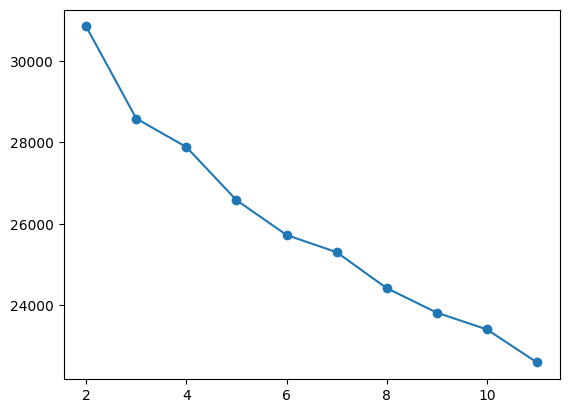

In [12]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
tfidf_vec = CountVectorizer()
tfidf_vects = tfidf_vec.fit_transform(df_azn['Reviews'].values.astype('U'))
names= tfidf_vec.get_feature_names_out()

## ELBOW METHOD
from sklearn.cluster import KMeans
clus_modl = []
for i in range(2,12):
    kmeans = KMeans(n_clusters = i, init = "k-means++", random_state = 45)
    kmeans.fit(tfidf_vects)
    clus_modl.append(kmeans.inertia_)

plt.plot(range(2,12), clus_modl, marker = "o")



In [16]:
#forming 4 clusters
from sklearn.cluster import KMeans
k_model = KMeans(n_clusters = 4,init='k-means++',max_iter=10000, random_state=50)
k_model.fit(tfidf_vects)
from collections import Counter
Counter(k_model.labels_)

# Clusters containing words with max strength
no_of_words = 5
centroids = k_model.cluster_centers_.argsort()[:, ::-1]
for a in range(4):
    key_features = [names[i] for i in centroids[a, :no_of_words]]
    print('this is cluster number  '+str(a+1))
    print('frequently present  Words:', key_features)

cluster_center=k_model.cluster_centers_
cluster_center

this is cluster number  1
frequently present  Words: ['phone', 'screen', 'sim', 'use', 'good']
this is cluster number  2
frequently present  Words: ['phone', 'one', 'screen', 'use', 'would']
this is cluster number  3
frequently present  Words: ['phone', 'get', 'fast', 'really', 'sim']
this is cluster number  4
frequently present  Words: ['phone', 'good', 'work', 'great', 'use']


array([[0.01724138, 0.        , 0.20689655, ..., 0.01724138, 0.        ,
        0.        ],
       [0.        , 0.01724138, 0.1637931 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 2.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.01939394, ..., 0.        , 0.00484848,
        0.00363636]])

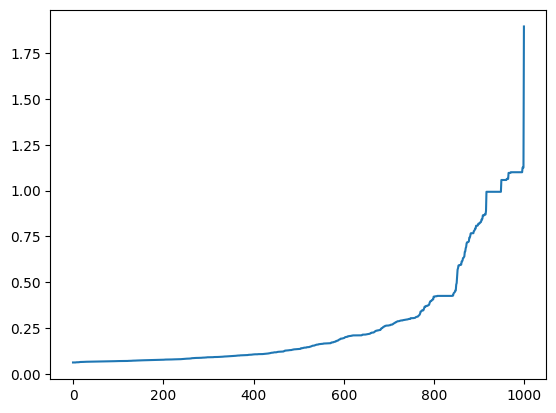

In [17]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt
import gensim
# for word2vec model this is procedure we are following
# Assuming df_mobile is preloaded and 'Reviews' column is properly cleaned
amzn_reviews = [str(review).split() for review in df_azn['Reviews']]

# Word2Vec model
word2vec_mdl = gensim.models.Word2Vec(amzn_reviews, vector_size=100, workers=4)

# Generate feature vectors for each review
word_vect = []
for a in amzn_reviews:
    good_words = [b for b in a if b in word2vec_mdl.wv]
    if good_words:
        review_vec = np.mean([word2vec_mdl.wv[b] for b in good_words], axis=0)
        word_vect.append(review_vec)
    else:
        word_vect.append(np.zeros(word2vec_mdl.vector_size))  # w2v_model.vector_size should be 100 as per your setting

word_vect = np.array(word_vect)
def compute_120th_nearest_neighbor(x, data):
    distances = euclidean_distances([x], data)[0]
    return np.partition(distances, 119)[119]

nearest_nigbur = [compute_120th_nearest_neighbor(val, word_vect) for val in word_vect[:1000]]
nearest_nigbur.sort()
plt.plot([x for x in range(len(nearest_nigbur))], nearest_nigbur)

In [18]:
# DBSCAN clustering
epohs = 5  # This needs to be chosen based on your Elbow plot
minPts = 2 * 100  # Consider reviewing this value
dbscan_model = DBSCAN(eps=epohs, min_samples=minPts)
df_azn["DBS Cluster Label"] = dbscan_model.fit_predict(word_vect)
dbscan_model

DBSCAN(eps=5, min_samples=200)

Cluster 1: ['feel lucky found used phone used hard phone line someone upgraded sold one son liked old one finally fell apart years want upgrade thank seller really appreciate honesty said used phone recommend seller highly would', 'nice phone nice grade pantach revue clean set easy set never android phone fantastic say least perfect size surfing social media great phone samsung', 'pleased', 'great phone replace lost phone thing volume button work still settings adjust job eligible upgrade phone thaanks', 'already phone problems know stated used dang state charge wish would read comments would purchased item cracked side damaged goods trying charge another way work requesting money back get money back signed unhappy customer', 'charging port loose got soldered needed new battery well later including cost purchase usable phone phone sold state', 'phone looks good stay charged buy new battery still stay charged long trashed money lost never buy person', 'originally using samsung galaxy sp

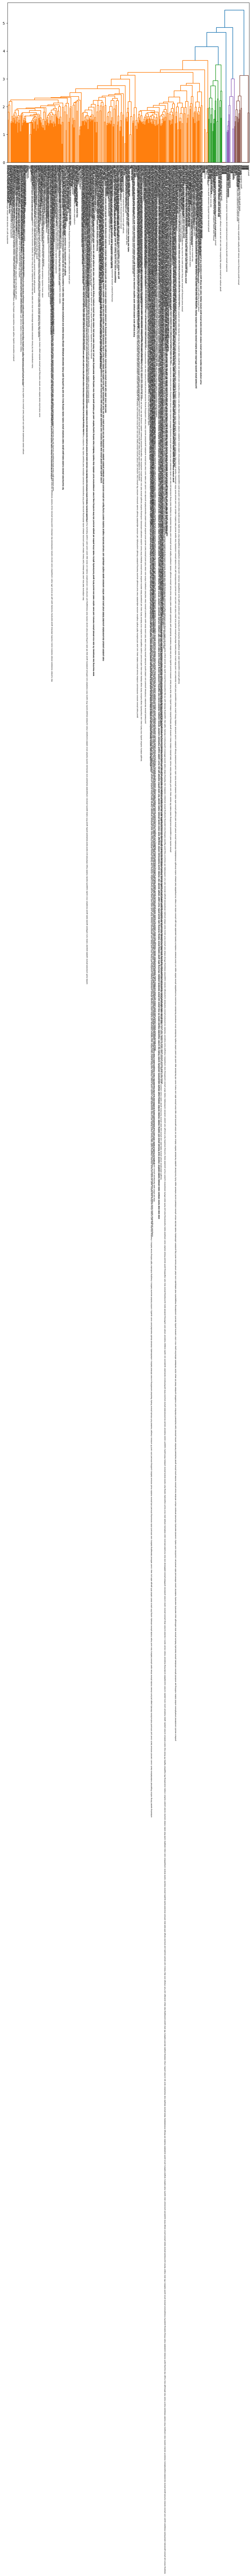

In [19]:
#Hierarchical clustering Model
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

#taking only 500 part_reviewss for this problem since colab is crashing
part_reviews = df_azn['Reviews'][:500].tolist()

#tf-idf vector transformation
w_vector = TfidfVectorizer(stop_words='english')
x_word_vec = w_vector.fit_transform(part_reviews)

#Calculating the cosine similarity
cos_similar_model = cosine_similarity(x_word_vec)

#Apply hierarchical clustering
link_matr = linkage(1 - cos_similar_model, method='complete')

#visualizong using a dendrogram
plt.figure(figsize=(12, 8))
dendrogram(link_matr, labels=part_reviews, orientation='top', distance_sort='descending', show_leaf_counts=True)

no_of_cluster = 3
h_model = AgglomerativeClustering(n_clusters=no_of_cluster, affinity='cosine', linkage='complete').fit_predict(1 - cos_similar_model)

for s in range(no_of_cluster):
    c_idxs = np.where(h_model == s)[0]
    cl_part_reviews = [part_reviews[i] for i in c_idxs]
    print(f"Cluster {s + 1}: {cl_part_reviews}")

In [20]:
!pip install sentence-transformers

In [ ]:
pip install -U sentence-transformers

In [21]:
#BERT model on the revies of amazon
#BERT Model
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

#Loading the BERT model
BERT_model = SentenceTransformer('bert-base-nli-mean-tokens')

#Because the original column is too big and the system can crash
part_reviews = df_azn['Reviews'][:500].tolist()

#Embedding texts for machine readable formats
embed_reviws = BERT_model.encode(part_reviews)


#For a visualization
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(embed_reviws)


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.99k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/399 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**

**Write your response here:**

Me after observing all models results I can say that bert is very efficeint to many words but the problem with these all models commonly is high processing time its taking a lot of time to excute the model in the traning period this made me to choose more robust model called bert comparedtivley it is very fast and efficent in all terms. The hiiglighted part among all models is hireachicla model where it clearly displayed all the major repeated words.


.

.

.

.




# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.


**(Your submission will not be graded if this question is left unanswered)**



In [22]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:

This is really a huge exercise to me, and its really less time for running huge models with 2 lakhs records I am upset with the time duriation as am unable to efficiently study the different models apart of these moels mentioned. And also in this execise is really knowledgable learning new stuff about models I have defined each and every model



'''

'\nPlease write you answer here:\n\nThis is really a huge exercise to me, and its really less time for running huge models with 2 lakhs records I am upset with the time duriation as am unable to efficiently study the different models apart of these moels mentioned. And also in this execise is really knowledgable learning new stuff about models I have defined each and every model\n\n\n\n'